## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
df_merged = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'], how='left')
df_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = df_merged.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [17]:
drug_median = df_merged.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
drug_variance = df_merged.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [22]:
drug_stdDev = df_merged.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_stdDev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [23]:
drug_SEM = df_merged.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Bar plots

Text(0, 0.5, 'Number of Data points')

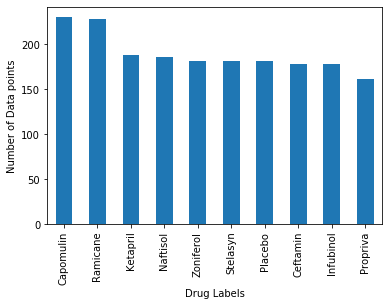

In [24]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_vCounts = df_merged["Drug Regimen"].value_counts()

drug_vCounts.plot(kind = "bar")
plt.xlabel("Drug Labels")
plt.ylabel("Number of Data points")
##plt.ticks

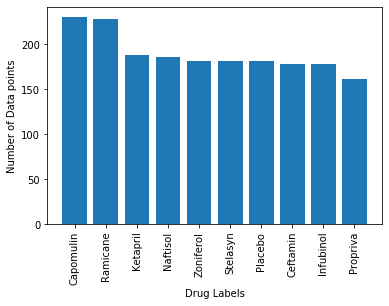

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(drug_vCounts.index.values, drug_vCounts.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Labels")
plt.ylabel("Number of Data points")
plt.show()

## Pie plots

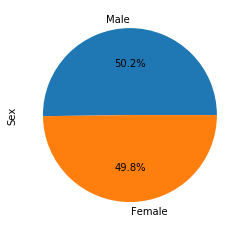

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_genCounts = mouse_metadata["Sex"].value_counts()
mouse_genCounts.plot(kind = "pie", autopct='%1.1f%%')
plt.show()


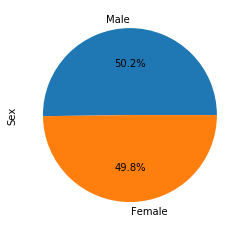

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_genCounts.values, labels = mouse_genCounts.index.values, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouse_success = df_merged.groupby("Mouse ID").max()
mouse_success = mouse_success.reset_index()
mouse_success

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
mouse_merge = mouse_success[["Mouse ID", "Timepoint"]].merge(df_merged, on = ["Mouse ID", "Timepoint"], how = "left")
mouse_merge

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [26]:
#Value 1
Capomulin = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
Capomulin

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [27]:
#Value 2
Ramicane = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
Ramicane

6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#val 3
Ketapril = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Ketapril"]["Tumor Volume (mm3)"]
Ketapril

8      49.783419
35     58.046569
39     62.175705
40     65.415955
46     60.233733
55     48.194578
60     45.000000
63     71.905117
67     69.872251
73     74.104086
75     45.000000
96     73.715619
106    50.659581
121    69.253503
123    73.901399
133    66.229606
137    78.567014
146    64.487812
148    75.294936
153    51.236606
192    66.268801
196    56.720095
200    63.189432
214    67.989530
235    62.909441
Name: Tumor Volume (mm3), dtype: float64

In [30]:
##val 4
Naftisol = mouse_merge.loc[mouse_merge["Drug Regimen"] == "Naftisol"]["Tumor Volume (mm3)"]
Naftisol

16     74.997764
23     73.051363
47     63.105696
49     55.138953
51     68.359777
62     52.079510
91     69.563621
112    63.946640
113    76.668817
117    54.082437
126    63.586395
140    50.015079
165    62.670759
166    69.778544
187    75.113288
195    45.000000
197    65.466074
204    51.296543
225    63.283288
226    45.000000
233    53.726101
238    48.475003
242    46.129357
247    65.741070
248    73.867845
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen